<a href="https://colab.research.google.com/github/agarciam980902/agarciam980902/blob/main/Housing_Pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Master in Applied Economics - Data Science for Economics**

# Individual Assignment: House Pricing



For this assignment, we make use of a dataset from a [Housing Prices Competition](https://www.kaggle.com/competitions/home-data-for-ml-course/) hosted by Kaggle, a popular Data Science website.

In the following cell, we import both the training and the test data. The train data includes the variable of interest (the one to be predicted in the column *SalePrice*), and a test dataset that does not. The objective is to estimate the price for each house in the test set.

Don't forget to modify the path to the files if necessary!

*First I will allow to import files from the drive into this collab file*

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# I add other libraries in case I might need them for future exercises

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib as mpl

# First given code + new road into files

train = pd.read_csv("drive/MyDrive/DATA_SCIENCE/PYTHON/Individual Assignment/train.csv")
print('The dimensions of the train dataset are:')
print(train.shape)

test = pd.read_csv("drive/MyDrive/DATA_SCIENCE/PYTHON/Individual Assignment/test.csv")
print('The dimensions of the test dataset are:')
print(test.shape)

The dimensions of the train dataset are:
(1460, 81)
The dimensions of the test dataset are:
(1459, 80)


**Exercise 1 (7.5 pts)**. Using the *train* dataframe, display 3 figures to illustrate facts that you find interesting about the data .  

In [ ]:
# First I want to see what kind of data we have on the dataset

train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


Text(0, 0.5, 'Sale Price')

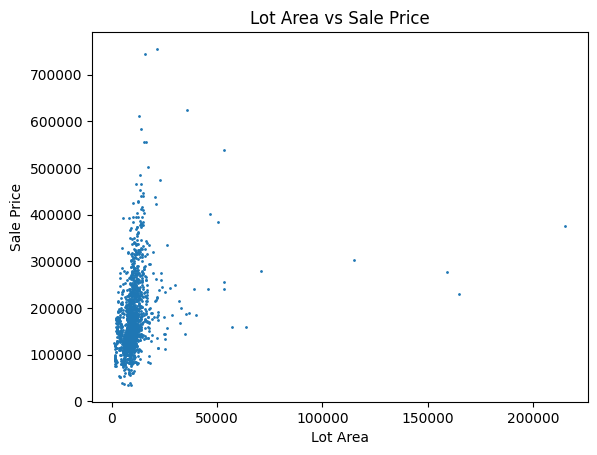

In [ ]:
# From the different columns of data i think it would be interesting to see the relationship between:
# Lot area & Sale Price
# Amount of houses sold per year
# Lot Frontage & Sale Price

# Adjusting the size of plot
mpl.rcParams['lines.markersize'] = 1

# Lets start with lot area and sale price
x = train['LotArea']
y = train['SalePrice']

plt.scatter(x, y)
plt.title('Lot Area vs Sale Price')
plt.xlabel('Lot Area')
plt.ylabel('Sale Price')

*From this initial graph we can assess that within our data set, a great majority of the houses have a similar lot area and an increase on the sales price might be due to other variables*

Text(0.5, 1.0, 'Number of Houses Sold per Year')

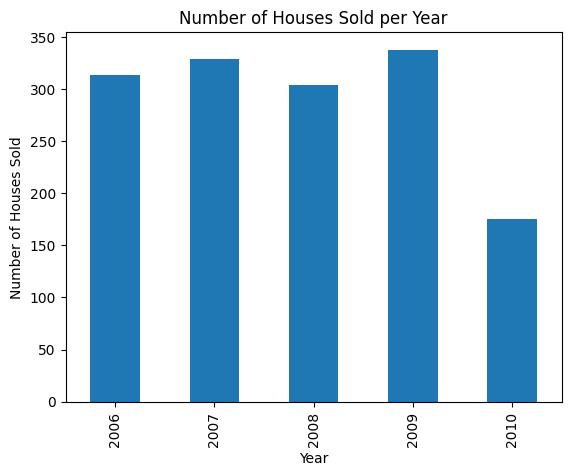

In [ ]:
# Now we want to see the amount of houses sold per year

yearly_sales = train['YrSold'].value_counts().sort_index()

# Explanation of code:
# We create a count of each time a variable is named within a column, in this case each time a year is named under the column of YrSold
# We do this by 1) taking the data in said column "train['YrSold]" 2) countaing each time a value is mentioned "value_counts()"
# 3) Give it an ascending value order "sort_index()"

yearly_sales.plot.bar(x='YrSold', y='Number of Occurrences')
plt.xlabel("Year")
plt.ylabel("Number of Houses Sold")
plt.title("Number of Houses Sold per Year")

*We can see that the number of houses sold decreased significantly during 2010, probably due to the financial crisis that startes in 2009*

Text(0, 0.5, 'Sale Price')

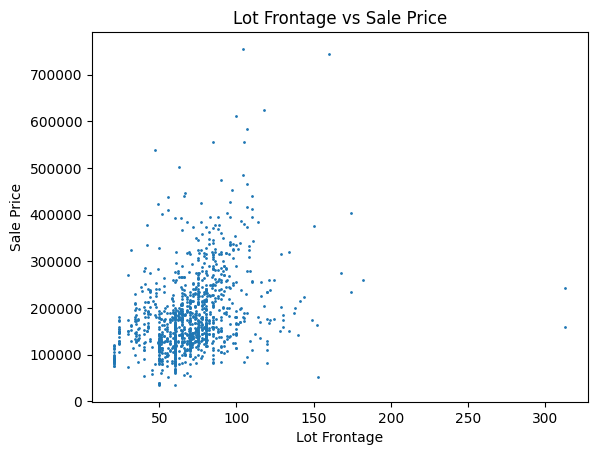

In [ ]:
# Adjusting the size of plot
mpl.rcParams['lines.markersize'] = 1

# Lets start with lot area and sale price
x = train['LotFrontage']
y = train['SalePrice']

plt.scatter(x, y)
plt.title('Lot Frontage vs Sale Price')
plt.xlabel('Lot Frontage')
plt.ylabel('Sale Price')

*There seems to be a bit more variety within the lot frontage which seemes to answer better to the range of prices within this set of houses. Its still not a good variable to explain the sales price. Probably we would need to create a MLRS in order to see a more trended line that explains the sales of price*

**Exercise 2 (7.5 pts)** . For each house in the test dataset, set its price according to the average price of houses sold in the same year (*YrSold*) with the same number of bedrooms (*BedroomAbvGr*).  

In [ ]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
# First we obtain the average prices from the train data set
# Here we get the average prices from both variables YrSold & BedroomAbvGr

avg_prices = train.groupby(['YrSold', 'BedroomAbvGr'])['SalePrice'].mean().reset_index()

#Then we merge this new data with the "Test" data set according to the values of YrSold & BedroomAbvGr

test = test.merge(avg_prices, on=['YrSold', 'BedroomAbvGr'], how='left')

#Finally we rename the columns with the desired name and we print them to ensure that our process was done correctly.

test = test.rename(columns={'SalePrice': 'PredictedSalePrice'})
print(test[['YrSold', 'BedroomAbvGr', 'PredictedSalePrice']].head())

   YrSold  BedroomAbvGr  PredictedSalePrice
0    2010             2       150675.666667
1    2010             3       175297.393939
2    2010             3       175297.393939
3    2010             3       175297.393939
4    2010             2       150675.666667


**Note**: the exercises' values are expressed in proportion to an overall final grade of 100 pts.